In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### 1. Реалізація обчислення гістрограми яскравості для кольорового зображення

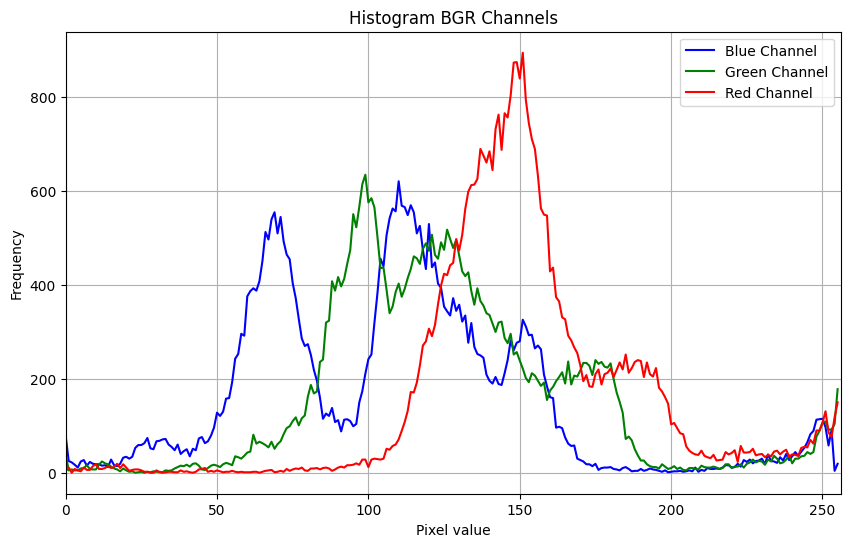

(array([[116, 113, 125, ..., 120, 120, 121],
        [149, 123, 112, ..., 104, 103, 103],
        [122,  98,  97, ..., 103, 108, 111],
        ...,
        [154, 147, 147, ..., 164, 161, 160],
        [157, 151, 153, ..., 167, 165, 165],
        [165, 148, 140, ..., 167, 171, 178]], dtype=uint8),
 array([[120, 117, 129, ..., 140, 140, 141],
        [153, 127, 116, ..., 124, 123, 123],
        [126, 102, 101, ..., 123, 128, 131],
        ...,
        [161, 154, 154, ..., 185, 182, 181],
        [166, 160, 162, ..., 188, 186, 186],
        [174, 157, 149, ..., 188, 192, 199]], dtype=uint8),
 array([[125, 122, 134, ..., 145, 145, 146],
        [158, 132, 121, ..., 129, 128, 128],
        [131, 107, 106, ..., 128, 133, 136],
        ...,
        [170, 163, 163, ..., 200, 197, 196],
        [176, 170, 172, ..., 203, 201, 201],
        [184, 167, 159, ..., 203, 207, 214]], dtype=uint8))

In [42]:
image = cv.imread('images/1.jpg')

channels = cv.split(image)
histSize = 256
histRange = (0, 256)
accumulate = False

colors = ['b', 'g', 'r']
channels_names = ["Blue", "Green", "Red"]

plt.figure(figsize=(10,6))
for i, color in enumerate(colors):
    hist = cv.calcHist([channels[i]], [0], None, [histSize], histRange, accumulate=accumulate)
    plt.plot(hist, color=color, label=f"{channels_names[i]} Channel")
    plt.xlim([0, 256])

plt.title('Histogram BGR Channels')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


End of video or cannot fetch the frame.


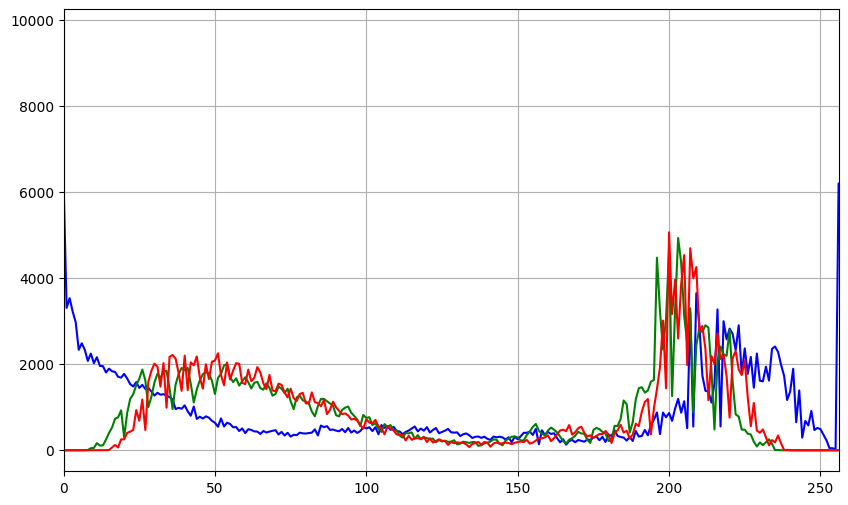

In [35]:
video_path = "videos/video.mp4"
cap = cv.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

all_sum_channels = [[] for _ in range(3)]

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video or cannot fetch the frame.")
        break

    channels = cv.split(frame)
    for i in range(len(colors)):
        all_sum_channels[0].append(cv.calcHist([channels[0]], [0], None, [histSize], histRange, accumulate=accumulate))
        all_sum_channels[1].append(cv.calcHist([channels[1]], [0], None, [histSize], histRange, accumulate=accumulate))
        all_sum_channels[2].append(cv.calcHist([channels[2]], [0], None, [histSize], histRange, accumulate=accumulate))

    if cv.waitKey(0) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

plt.figure(figsize=(10,6))

for i, color in enumerate(colors):
    plt.plot(np.concatenate(all_sum_channels[i]), color=color, label=f"{channels_names[i]} Channel")
plt.xlim([0, 256])
plt.grid()
plt.show()

(0.0, 256.0)

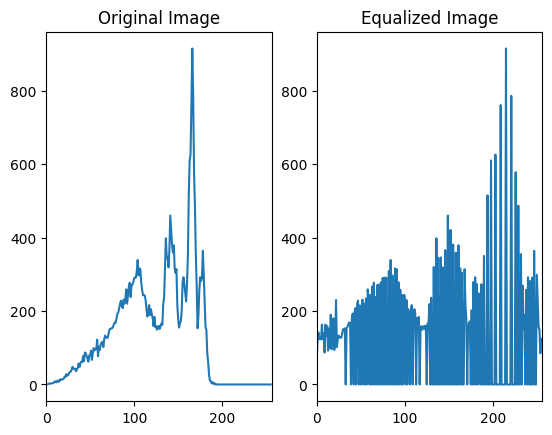

In [62]:
image = cv.imread('images/2.jpg', 0)  # Load in grayscale

# Apply histogram equalization
equalized_image = cv.equalizeHist(image.copy())

plt.subplot(1, 2, 1)
plt.title('Original Image')
hist_gray = cv.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(hist_gray)
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
hist_equalized_gray = cv.calcHist([equalized_image], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(hist_equalized_gray)
plt.xlim([0, 256])


In [69]:
image = image = cv.imread('images/1.jpg', 0)  

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_image = clahe.apply(image)

cv.imshow('Original Image', image)
cv.imshow('CLAHE Image', cl_image)

cv.waitKey(0)
cv.destroyAllWindows()